In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import (
    Embedding, Dense, SimpleRNN, LSTM, Bidirectional, Flatten
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split

In [30]:
# 1. 데이터 로드
ids = movie_reviews.fileids()
reviews = [movie_reviews.raw(fileid) for fileid in ids]
categories = [movie_reviews.categories(fileid)[0] for fileid in ids]

# 토큰화 및 정수 인코딩
max_word = 10000
tokenizer = Tokenizer(num_words=max_word, oov_token='UNK')
tokenizer.fit_on_texts(reviews)


In [31]:
tokenizer.fit_on_texts(reviews)
# 텍스트를 시퀀스로 변환
x = tokenizer.texts_to_sequences(reviews)
# 시퀀스 패딩
maxlen = 500
x = pad_sequences(x, maxlen=maxlen, truncating='pre')
# 레이블 인코딩
label_dict = {'pos': 1, 'neg': 0}
y = np.array([label_dict[c] for c in categories])
# 학습 테스트데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
# 2. 세가지 모델 구축, 학습
# 시드 고정 재현성 확보
np.random.seed(42)
tf.random.set_seed(42)
# 모델 성능
results = {}
# ----- model 1 baseline(Flatten + Dense) -----
model1 = Sequential([
    Embedding(input_dim=max_word, output_dim=32, input_length=maxlen),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history1 = model1.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
score1 = model1.evaluate(x_test, y_test, verbose=0)
results['Baseline'] = score1[1]
print(f'model1 정확도: {score1[1]}')


# ----- model 2 (SimpleRNN) -----
model2 = Sequential([
    Embedding(input_dim=max_word, output_dim=32, input_length=maxlen),
    SimpleRNN(32),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history2 = model2.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
score2 = model2.evaluate(x_test, y_test, verbose=0)
results['SimpleRNN'] = score2[1]
print(f'model2 정확도: {score2[1]}')

# ----- model 3 (Bidirectional LSTM) -----
model3 = Sequential([
    Embedding(input_dim=max_word, output_dim=64, input_length=maxlen),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history3 = model3.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
score3 = model3.evaluate(x_test, y_test, verbose=0)
results['Bidirectional LSTM'] = score3[1]
print(f'model3 정확도: {score3[1]}')

Epoch 1/10


c:\SKN20\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.5094 - loss: 0.6918 - val_acc: 0.5063 - val_loss: 0.6919
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9680 - loss: 0.5903 - val_acc: 0.5250 - val_loss: 0.6878
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9812 - loss: 0.4422 - val_acc: 0.5625 - val_loss: 0.6784
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9977 - loss: 0.2648 - val_acc: 0.5969 - val_loss: 0.6687
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9992 - loss: 0.1375 - val_acc: 0.6187 - val_loss: 0.6622
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 1.0000 - loss: 0.0746 - val_acc: 0.6187 - val_loss: 0.6603
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 1.0000 - loss: 0.0449 - val_acc: 0.6219 - val_loss: 0.6600
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 1.0000 - loss: 0.0298 - val_acc: 0.6313 - val_loss: 0.6598
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 1.0000 - loss: 0.0212 - va

 Bidirectional LSTM : 0.7350
 Baseline : 0.6550
 SimpleRNN : 0.4725


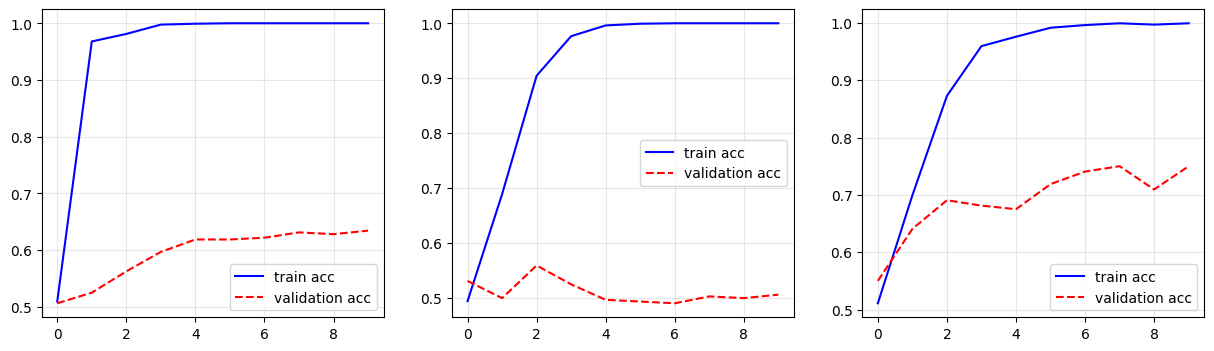

In [33]:
# 3 .성능 비교 및 시각화
for modelname, acc in  sorted(results.items(), key =lambda x : x[1],reverse=True):
    print(f' {modelname} : {acc:.4f}')

fig,ax =  plt.subplots(1,3,figsize=(15,4))
# baseline
ax[0].plot(history1.history['acc'], 'b-', label='train acc')
ax[0].plot(history1.history['val_acc'], 'r--', label='validation acc')
ax[0].legend()
ax[0].grid(True,alpha=0.3)
# SmpleRnn
ax[1].plot(history2.history['acc'], 'b-', label='train acc')
ax[1].plot(history2.history['val_acc'], 'r--', label='validation acc')
ax[1].legend()
ax[1].grid(True,alpha=0.3)
# Bidirectional_LSTM
ax[2].plot(history3.history['acc'], 'b-', label='train acc')
ax[2].plot(history3.history['val_acc'], 'r--', label='validation acc')
ax[2].legend()
ax[2].grid(True,alpha=0.3)